# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

/home/aleksei/github_projects/machine_learning_coursera/env/main/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

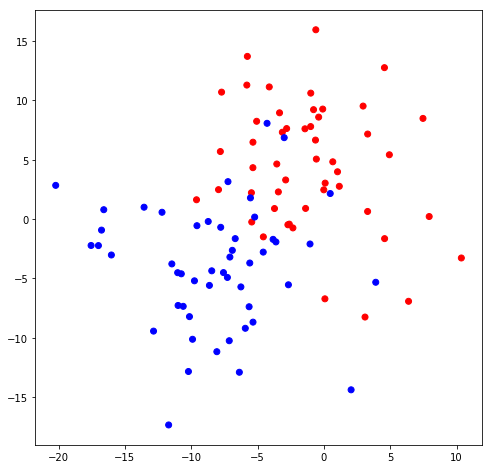

In [4]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [6]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [7]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [8]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [9]:
print test_labels

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [10]:
print ridge_predictions

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [11]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [12]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [13]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [ ]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [ ]:
log_regressor.fit(train_data, train_labels)

In [ ]:
lr_predictions = log_regressor.predict(test_data)

In [ ]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [ ]:
print test_labels

In [ ]:
print lr_predictions

In [ ]:
print lr_proba_predictions

In [ ]:
print metrics.accuracy_score(test_labels, lr_predictions)

In [ ]:
print metrics.accuracy_score(test_labels, ridge_predictions)

### Оценка качества по cross-validation

#### cross_val_score

In [ ]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [ ]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [ ]:
lr_scoring

In [ ]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

In [ ]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

#### cross_val_score с заданными scorer и cv_strategy

In [ ]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [ ]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [ ]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [ ]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [ ]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

In [ ]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())